# Feedforward Neural Networks on MNIST I: Optimization Algorithms
Training neural networks on the MNIST dataset using multiple optimization algorithms. This exercise will leveral all 10 digit labels from the MNIST dataset and use a 70-15-15 (train-validation-test) split.

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import neural_network
from sklearn.model_selection import validation_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
##Part (a) Read data and confirm number of entries
data = fetch_openml('mnist_784', version=1, cache=True)
data2 = pd.DataFrame(data=data.data)
data2.index = data.target
data2.head()

pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
class                                                                           
5         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
9         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
class           ...                                                     
5          0.0  ...       0.0       0.0       0.0       0.0       0.0   
0          0.0  ...       0.0       0.0       0.0       0.0       0.0   
4          0.0  ...       0.0       0.0       0.0       0.0       0.0   
1          0.0  ...       0.0       0.0       0.0       0.0       0.0   
9          0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  pixel784  
class                                                    
5           0.0       0.0       0.0       0.0       0.0  
0           0.0       0.0       0.0       0.0       0.0  
4           0.0       0.0       0.0       0.0       0.0  
1           0.0       0.0       0.0       0.0       0.0  
9           0.0       0.0       0.0       0.0       0.0  

[5 rows x 784 columns]

In [3]:
Xtrain, Xtest, ytrain, ytest = train_test_split(data2.loc[:, data2.columns != "class"],data2.index, test_size=0.3, random_state=1)
Xvalidate, Xtest, yvalidate, ytest = train_test_split(Xtest,ytest, test_size=0.5, random_state=1)

In [4]:
print(len(Xtrain))
print(len(Xtest))
print(len(Xvalidate))
print(len(ytrain))
print(len(ytest))
print(len(yvalidate))

49000
10500
10500
49000
10500
10500


## Part A: Adam optimizer and learning rate [0.001, 0.01, 0.1]

### 1 hidden layer with 50 neurons
### Learning rate 0.001

In [5]:
mlpc_1 = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='adam', learning_rate_init=0.001,random_state=1)
mlpc_1.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=50, random_state=1)

In [6]:
mlpc1_acc_train = mlpc_1.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.001, 1 hidden layer, 50 neurons:', mlpc1_acc_train)

Training accuracy learning rate 0.001, 1 hidden layer, 50 neurons: 0.9887551020408163


In [7]:
mlpc1_acc_test = mlpc_1.score(Xtest, ytest)
print('Test accuracy learning rate 0.001, 1 hidden layer, 50 neurons:', mlpc1_acc_test)

Test accuracy learning rate 0.001, 1 hidden layer, 50 neurons: 0.9482857142857143


### Learning rate 0.01

In [8]:
mlpc_1_2 = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='adam', learning_rate_init=0.01,random_state=1)
mlpc_1_2.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.01, random_state=1)

In [9]:
mlpc1_2_acc_train = mlpc_1_2.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.01, 1 hidden layer, 50 neurons:', mlpc1_2_acc_train)

Training accuracy learning rate 0.01, 1 hidden layer, 50 neurons: 0.7412040816326531


In [10]:
mlpc1_2_acc_test = mlpc_1_2.score(Xtest, ytest)
print('Test accuracy learning rate 0.01, 1 hidden layer, 50 neurons:', mlpc1_2_acc_test)

Test accuracy learning rate 0.01, 1 hidden layer, 50 neurons: 0.7297142857142858


### Learning rate 0.01

In [11]:
mlpc_1_3 = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='adam', learning_rate_init=0.1,random_state=1)
mlpc_1_3.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.1, random_state=1)

In [12]:
mlpc_1_3_acc_train = mlpc_1_3.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.1, 1 hidden layer, 50 neurons:', mlpc_1_3_acc_train)

Training accuracy learning rate 0.1, 1 hidden layer, 50 neurons: 0.10483673469387755


In [13]:
mlpc1_3_acc_test = mlpc_1_3.score(Xtest, ytest)
print('Test accuracy learning rate 0.1, 1 hidden layer, 50 neurons:', mlpc1_3_acc_test)

Test accuracy learning rate 0.1, 1 hidden layer, 50 neurons: 0.10333333333333333


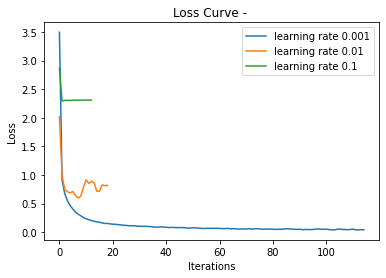

In [14]:
plt.plot(mlpc_1.loss_curve_, label="learning rate 0.001")
plt.plot(mlpc_1_2.loss_curve_, label="learning rate 0.01")
plt.plot(mlpc_1_3.loss_curve_, label="learning rate 0.1")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - ')
plt.legend()
plt.show()

### 2 hidden layers (20,10) neurons

### Learning rate 0.001

In [15]:
mlpc_2 = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='adam', learning_rate_init=0.001,random_state=1)
mlpc_2.fit(Xtrain, ytrain)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1)

In [16]:
mlpc2_acc_train = mlpc_2.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.001, 2 hidden layer, 20,10 neurons:', mlpc2_acc_train)

Training accuracy learning rate 0.001, 2 hidden layer, 20,10 neurons: 0.9804285714285714


In [17]:
mlpc2_acc_test = mlpc_2.score(Xtest, ytest)
print('Test accuracy learning rate 0.1, 1 hidden layer, 50 neurons:', mlpc2_acc_test)

Test accuracy learning rate 0.1, 1 hidden layer, 50 neurons: 0.9285714285714286


### Learning rate 0.01

In [18]:
mlpc_2_2 = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='adam', learning_rate_init=0.01,random_state=1)
mlpc_2_2.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(20, 10), learning_rate_init=0.01,
              random_state=1)

In [19]:
mlpc2_2_acc_train = mlpc_2_2.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.01, 2 hidden layer, 20,10 neurons:', mlpc2_2_acc_train)

Training accuracy learning rate 0.01, 2 hidden layer, 20,10 neurons: 0.1119795918367347


In [20]:
mlpc2_2_acc_test = mlpc_2_2.score(Xtest, ytest)
print('Test accuracy learning rate 0.1, 1 hidden layer, 50 neurons:', mlpc2_2_acc_test)

Test accuracy learning rate 0.1, 1 hidden layer, 50 neurons: 0.11342857142857143


### Learning rate 0.1

In [21]:
mlpc_2_3 = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='adam', learning_rate_init=0.1,random_state=1)
mlpc_2_3.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(20, 10), learning_rate_init=0.1,
              random_state=1)

In [22]:
mlpc2_3_acc_train = mlpc_2_3.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.1, 2 hidden layer, 20,10 neurons:', mlpc2_3_acc_train)

Training accuracy learning rate 0.1, 2 hidden layer, 20,10 neurons: 0.09851020408163265


In [23]:
mlpc2_3_acc_test = mlpc_2_3.score(Xtest, ytest)
print('Test accuracy learning rate 0.1, 1 hidden layer, 50 neurons:', mlpc2_3_acc_test)

Test accuracy learning rate 0.1, 1 hidden layer, 50 neurons: 0.09923809523809524


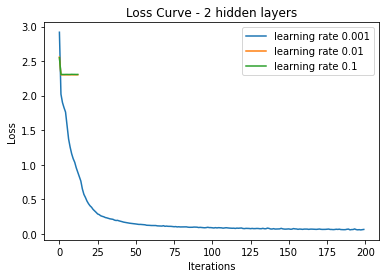

In [24]:
plt.plot(mlpc_2.loss_curve_, label="learning rate 0.001")
plt.plot(mlpc_2_2.loss_curve_, label="learning rate 0.01")
plt.plot(mlpc_2_3.loss_curve_, label="learning rate 0.1")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - 2 hidden layers')
plt.legend()
plt.show()

### Analysis for part a:<br/>
The best model corresponds with learning rate 0.001 and 1 hidden layer → 94.82% test accuracy. We can see from the loss curve that higher learning rates have great loss while learning rate of 0.001 takes more iterations but has the smallest loss. The learning rate 0.001 models for 1 hidden layer and 2 hidden layers are similar in test accuracy but the 1 hidden layer model converges faster.

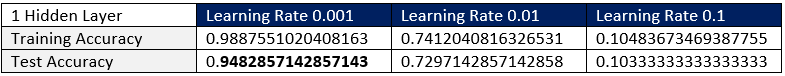

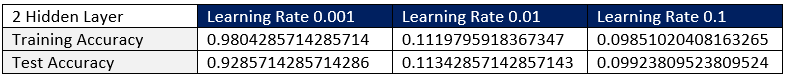

## Part B: SGD optimizer with learning rates [0.001, 0.1, 0.1]

### 1 hidden layer with 50 neurons

### Learning rate 0.001

In [25]:
mlpc_1 = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='sgd', learning_rate_init=0.001,random_state=1)
mlpc_1.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=50, random_state=1, solver='sgd')

In [26]:
mlpc1_acc_train = mlpc_1.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.001, 1 hidden layer, 50 neurons:', mlpc1_acc_train)

Training accuracy learning rate 0.001, 1 hidden layer, 50 neurons: 0.9389183673469388


In [27]:
mlpc1_acc_test = mlpc_1.score(Xtest, ytest)
print('Test accuracy learning rate 0.001, 1 hidden layer, 50 neurons:', mlpc1_acc_test)

Test accuracy learning rate 0.001, 1 hidden layer, 50 neurons: 0.9098095238095238


### Learning rate 0.01

In [28]:
mlpc1_2 = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='sgd', learning_rate_init=0.01,random_state=1)
mlpc1_2.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.01, random_state=1,
              solver='sgd')

In [29]:
mlpc1_2_acc_train = mlpc1_2.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.01, 1 hidden layer, 50 neurons:', mlpc1_2_acc_train)

Training accuracy learning rate 0.01, 1 hidden layer, 50 neurons: 0.11338775510204081


In [30]:
mlpc1_2_acc_test = mlpc1_2.score(Xtest, ytest)
print('Test accuracy learning rate 0.01, 1 hidden layer, 50 neurons:', mlpc1_2_acc_test)

Test accuracy learning rate 0.01, 1 hidden layer, 50 neurons: 0.11533333333333333


### Learning rate 0.1

In [31]:
mlpc_1_3 = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='sgd', learning_rate_init=0.1,random_state=1)
mlpc_1_3.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.1, random_state=1,
              solver='sgd')

In [32]:
mlpc_1_3_acc_train = mlpc_1_3.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.1, 1 hidden layer, 50 neurons:', mlpc_1_3_acc_train)

Training accuracy learning rate 0.1, 1 hidden layer, 50 neurons: 0.1119795918367347


In [33]:
mlpc_1_3_acc_test = mlpc_1_3.score(Xtest, ytest)
print('Test accuracy learning rate 0.1, 1 hidden layer, 50 neurons:', mlpc_1_3_acc_test)

Test accuracy learning rate 0.1, 1 hidden layer, 50 neurons: 0.11342857142857143


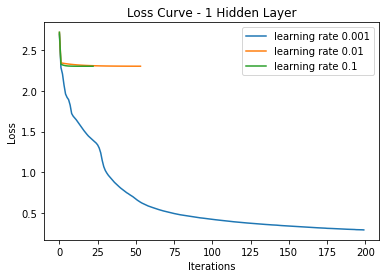

In [97]:
plt.plot(mlpc_1.loss_curve_, label="learning rate 0.001")
plt.plot(mlpc1_2.loss_curve_, label="learning rate 0.01")
plt.plot(mlpc_1_3.loss_curve_, label="learning rate 0.1")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - 1 Hidden Layer')
plt.legend()
plt.show()

### 2 hidden layers (20,10) neurons

### Learning rate 0.001

In [35]:
mlpc_2 = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='sgd', learning_rate_init=0.001,random_state=1)
mlpc_2.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1, solver='sgd')

In [36]:
mlpc2_acc_train = mlpc_2.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.001, 2 hidden layer, 20,10 neurons:', mlpc2_acc_train)

Training accuracy learning rate 0.001, 2 hidden layer, 20,10 neurons: 0.1119795918367347


In [37]:
mlpc2_acc_test = mlpc_2.score(Xtest, ytest)
print('Test accuracy learning rate 0.1, 2 hidden layer, 20,10 neurons:', mlpc2_acc_test)

Test accuracy learning rate 0.1, 2 hidden layer, 20,10 neurons: 0.11342857142857143


### Learning rate 0.01

In [38]:
mlpc_2_2 = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='sgd', learning_rate_init=0.01,random_state=1)
mlpc_2_2.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(20, 10), learning_rate_init=0.01,
              random_state=1, solver='sgd')

In [39]:
mlpc2_2_acc_train = mlpc_2_2.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.01, 2 hidden layer, 20,10 neurons:', mlpc2_2_acc_train)

Training accuracy learning rate 0.01, 2 hidden layer, 20,10 neurons: 0.1119795918367347


In [40]:
mlpc2_2_acc_test = mlpc_2_2.score(Xtest, ytest)
print('Test accuracy learning rate 0.1,, 2 hidden layer, 20,10 neurons:', mlpc2_2_acc_test)

Test accuracy learning rate 0.1,, 2 hidden layer, 20,10 neurons: 0.11342857142857143


### Learning rate 0.1

In [100]:
mlpc_2_3 = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='sgd', learning_rate_init=0.1,random_state=1)
mlpc_2_3.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(20, 10), learning_rate_init=0.1,
              random_state=1, solver='sgd')

In [101]:
mlpc2_3_acc_train = mlpc_2_3.score(Xtrain, ytrain)
print('Training accuracy learning rate 0.1, 2 hidden layer, 20,10 neurons:', mlpc2_3_acc_train)

Training accuracy learning rate 0.1, 2 hidden layer, 20,10 neurons: 0.1119795918367347


In [102]:
mlpc2_3_acc_test = mlpc_2_3.score(Xtest, ytest)
print('Test accuracy learning rate 0.1, 2 hidden layer, 20,10 neurons:', mlpc2_3_acc_test)

Test accuracy learning rate 0.1, 2 hidden layer, 20,10 neurons: 0.11342857142857143


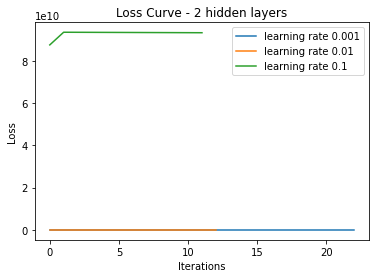

In [103]:
plt.plot(mlpc_2.loss_curve_, label="learning rate 0.001")
plt.plot(mlpc_2_2.loss_curve_, label="learning rate 0.01")
plt.plot(mlpc_2_3.loss_curve_, label="learning rate 0.1")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - 2 hidden layers')
plt.legend()
plt.show()

### Analysis for part b:
The best test accuracy is 90.98% which corresponds to learning rate 0.001 with 1 hidden layer – therefore it is the best model. Looking at the loss curve we can see that learning rate 0.001 ends up with the smallest loss (< 0.5) even though it takes more iterations than the other learning rates. 1 hidden layer performs better than models with 2 hidden layers based on the accuracy and the loss curve. The 2 hidden layer models only have accuracy around 11% and the loss is > 2.0 which is a much higher than the 1 hidden layer model loss.

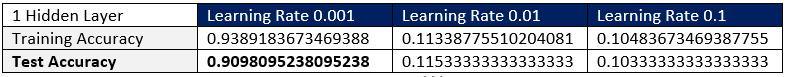

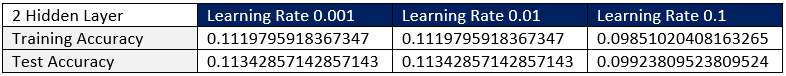

## Part C: SGD with Momentum

### 1 hidden layer with 50 neurons

### Momentum 0.1

In [45]:
mlpc_1 = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='sgd', momentum=0.1,learning_rate_init=0.001,random_state=1)
mlpc_1.fit(Xtrain, ytrain)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=50, momentum=0.1, random_state=1, solver='sgd')

In [46]:
mlpc1_acc_train = mlpc_1.score(Xtrain, ytrain)
print('Training accuracy momentum 0.1, 1 hidden layer, 50 neurons:', mlpc1_acc_train)

Training accuracy momentum 0.1, 1 hidden layer, 50 neurons: 0.9591632653061225


In [47]:
mlpc1_acc_test = mlpc_1.score(Xtest, ytest)
print('Test accuracy momentum 0.1, 1 hidden layer, 50 neurons:', mlpc1_acc_test)

Test accuracy momentum 0.1, 1 hidden layer, 50 neurons: 0.9324761904761905


### Momentum 0.5

In [48]:
mlpc1_2 = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='sgd', learning_rate_init=0.001, momentum=0.5,random_state=1)
mlpc1_2.fit(Xtrain, ytrain)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=50, momentum=0.5, random_state=1, solver='sgd')

In [49]:
mlpc1_2_acc_train = mlpc1_2.score(Xtrain, ytrain)
print('Training accuracy momentum 0.5, 1 hidden layer, 50 neurons:', mlpc1_2_acc_train)

Training accuracy momentum 0.5, 1 hidden layer, 50 neurons: 0.9613061224489796


In [50]:
mlpc1_2_acc_test = mlpc1_2.score(Xtest, ytest)
print('Test accuracy momentum 0.5, 1 hidden layer, 50 neurons:', mlpc1_2_acc_test)

Test accuracy momentum 0.5, 1 hidden layer, 50 neurons: 0.9273333333333333


### Momentum 0.9

In [51]:
mlpc_1_3 = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='sgd', learning_rate_init=0.001, momentum=0.9,random_state=1)
mlpc_1_3.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=50, random_state=1, solver='sgd')

In [52]:
mlpc_1_3_acc_train = mlpc_1_3.score(Xtrain, ytrain)
print('Training accuracy momentum 0.1, 1 hidden layer, 50 neurons:', mlpc_1_3_acc_train)

Training accuracy momentum 0.1, 1 hidden layer, 50 neurons: 0.9389183673469388


In [53]:
mlpc_1_3_acc_test = mlpc_1_3.score(Xtest, ytest)
print('Test accuracy momentum 0.1, 1 hidden layer, 50 neurons:', mlpc_1_3_acc_test)

Test accuracy momentum 0.1, 1 hidden layer, 50 neurons: 0.9098095238095238


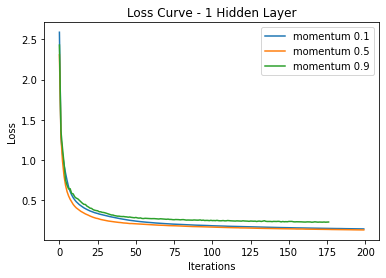

In [54]:
plt.plot(mlpc_1.loss_curve_, label="momentum 0.1")
plt.plot(mlpc1_2.loss_curve_, label="momentum 0.5")
plt.plot(mlpc_1_3.loss_curve_, label="momentum 0.9")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - 1 Hidden Layer')
plt.legend()
plt.show()

### 2 hidden layers (20,10) neurons

### Momentum 0.1

In [55]:
mlpc_1 = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='sgd', momentum=0.1,learning_rate_init=0.001,random_state=1)
mlpc_1.fit(Xtrain, ytrain)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(20, 10), momentum=0.1, random_state=1,
              solver='sgd')

In [56]:
mlpc1_acc_train = mlpc_1.score(Xtrain, ytrain)
print('Training accuracy momentum 0.1, 1 hidden layer, 50 neurons:', mlpc1_acc_train)

Training accuracy momentum 0.1, 1 hidden layer, 50 neurons: 0.9255510204081633


In [57]:
mlpc1_acc_test = mlpc_1.score(Xtest, ytest)
print('Test accuracy momentum 0.1, 1 hidden layer, 50 neurons:', mlpc1_acc_test)

Test accuracy momentum 0.1, 1 hidden layer, 50 neurons: 0.9081904761904762


### Momentum 0.5

In [58]:
mlpc1_2 = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='sgd', learning_rate_init=0.001, momentum=0.5,random_state=1)
mlpc1_2.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(20, 10), momentum=0.5, random_state=1,
              solver='sgd')

In [59]:
mlpc1_2_acc_train = mlpc1_2.score(Xtrain, ytrain)
print('Training accuracy momentum 0.5, 1 hidden layer, 50 neurons:', mlpc1_2_acc_train)

Training accuracy momentum 0.5, 1 hidden layer, 50 neurons: 0.112


In [60]:
mlpc1_2_acc_test = mlpc1_2.score(Xtest, ytest)
print('Test accuracy momentum 0.5, 1 hidden layer, 50 neurons:', mlpc1_2_acc_test)

Test accuracy momentum 0.5, 1 hidden layer, 50 neurons: 0.11342857142857143


### Momentum 0.9

In [61]:
mlpc_1_3 = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='sgd', learning_rate_init=0.001, momentum=0.9,random_state=1)
mlpc_1_3.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=(20, 10), random_state=1, solver='sgd')

In [62]:
mlpc_1_3_acc_train = mlpc_1_3.score(Xtrain, ytrain)
print('Training accuracy momentum 0.1, 1 hidden layer, 50 neurons:', mlpc_1_3_acc_train)

Training accuracy momentum 0.1, 1 hidden layer, 50 neurons: 0.1119795918367347


In [63]:
mlpc_1_3_acc_test = mlpc_1_3.score(Xtest, ytest)
print('Test accuracy momentum 0.1, 1 hidden layer, 50 neurons:', mlpc_1_3_acc_test)

Test accuracy momentum 0.1, 1 hidden layer, 50 neurons: 0.11342857142857143


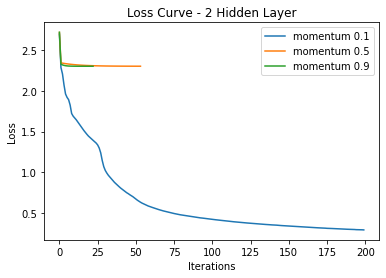

In [64]:
plt.plot(mlpc_1.loss_curve_, label="momentum 0.1")
plt.plot(mlpc1_2.loss_curve_, label="momentum 0.5")
plt.plot(mlpc_1_3.loss_curve_, label="momentum 0.9")
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Loss Curve - 2 Hidden Layer')
plt.legend()
plt.show()

### Analysis for part c:
The fastest converging algorithm is with momentum set to 0.9 and 2 hidden layers (seen in the 2nd loss curve). This model only has an accuracy of around 11% showing that it performs very poorly on the data.
The best performing model is the one with momentum 0.1 and 1 hidden layer  with 93% test accuracy.

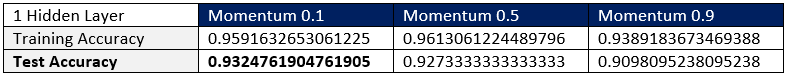

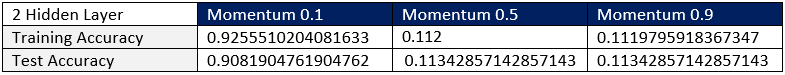

## Part D: Run Previous Algorithms with Early Stopping

### 1 Hidden Layer - Best Model from Part A

In [65]:
mlpc_adam = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='adam', early_stopping=True, learning_rate_init=0.001,random_state=1)
mlpc_adam.fit(Xtrain, ytrain)

MLPClassifier(early_stopping=True, hidden_layer_sizes=50, random_state=1)

In [66]:
mlpc_adam_train = mlpc_adam.score(Xtrain, ytrain)
print('Training accuracy adam solver, 1 hidden layer, 50 neurons:', mlpc_adam_train)

Training accuracy adam solver, 1 hidden layer, 50 neurons: 0.9696122448979592


In [67]:
mlpc_adam_test = mlpc_adam.score(Xtest, ytest)
print('Test accuracy learning adam solver, 1 hidden layer, 50 neurons:', mlpc_adam_test)

Test accuracy learning adam solver, 1 hidden layer, 50 neurons: 0.9433333333333334


### 1 Hidden Layer - Best Model from Part B

In [68]:
mlpc_sgd = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='sgd', early_stopping=True, learning_rate_init=0.001,random_state=1)
mlpc_sgd.fit(Xtrain, ytrain)

MLPClassifier(early_stopping=True, hidden_layer_sizes=50, random_state=1,
              solver='sgd')

In [69]:
mlpc_sgd_train = mlpc_sgd.score(Xtrain, ytrain)
print('Training accuracy sgd solver, 1 hidden layer, 50 neurons:', mlpc_sgd_train)

Training accuracy sgd solver, 1 hidden layer, 50 neurons: 0.9111224489795918


In [70]:
mlpc_sgd_test = mlpc_sgd.score(Xtest, ytest)
print('Test accuracy learning sgd solver, 1 hidden layer, 50 neurons:', mlpc_sgd_test)

Test accuracy learning sgd solver, 1 hidden layer, 50 neurons: 0.8918095238095238


### 1 Hidden Layer - Best Model from Part C

In [71]:
mlpc_momentum = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='sgd', early_stopping=True, momentum=0.1,learning_rate_init=0.001,random_state=1)
mlpc_momentum.fit(Xtrain, ytrain)

MLPClassifier(early_stopping=True, hidden_layer_sizes=50, momentum=0.1,
              random_state=1, solver='sgd')

In [72]:
mlpc_m_train = mlpc_momentum.score(Xtrain, ytrain)
print('Training accuracy momentum 0.1, 1 hidden layer, 50 neurons:', mlpc_m_train)

Training accuracy momentum 0.1, 1 hidden layer, 50 neurons: 0.946204081632653


In [73]:
mlpc_m_test = mlpc_momentum.score(Xtest, ytest)
print('Test accuracy learning momentum 0.1, 1 hidden layer, 50 neurons:', mlpc_m_test)

Test accuracy learning momentum 0.1, 1 hidden layer, 50 neurons: 0.923047619047619


### 2 Hidden Layers - Best Model from Part A

In [177]:
mlpc_adam = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='adam', early_stopping=True, learning_rate_init=0.001,random_state=1)
mlpc_adam.fit(Xtrain, ytrain)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 10), random_state=1)

In [178]:
mlpc_adam_train = mlpc_adam.score(Xtrain, ytrain)
print('Training accuracy adam solver, 1 hidden layer, 50 neurons:', mlpc_adam_train)

Training accuracy adam solver, 1 hidden layer, 50 neurons: 0.9651020408163266


In [179]:
mlpc_adam_test = mlpc_adam.score(Xtest, ytest)
print('Test accuracy learning adam solver, 1 hidden layer, 50 neurons:', mlpc_adam_test)

Test accuracy learning adam solver, 1 hidden layer, 50 neurons: 0.9294285714285714


### 2 Hidden Layers - Best Model from Part B

In [180]:
mlpc_sgd = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='sgd', early_stopping=True, learning_rate_init=0.001,random_state=1)
mlpc_sgd.fit(Xtrain, ytrain)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 10), random_state=1,
              solver='sgd')

In [181]:
mlpc_sgd_train = mlpc_sgd.score(Xtrain, ytrain)
print('Training accuracy sgd solver, 1 hidden layer, 50 neurons:', mlpc_sgd_train)

Training accuracy sgd solver, 1 hidden layer, 50 neurons: 0.1119795918367347


In [182]:
mlpc_sgd_test = mlpc_sgd.score(Xtest, ytest)
print('Test accuracy learning sgd solver, 1 hidden layer, 50 neurons:', mlpc_sgd_test)

Test accuracy learning sgd solver, 1 hidden layer, 50 neurons: 0.11342857142857143


### 2 Hidden Layers - Best Model from Part C

In [183]:
mlpc_momentum = neural_network.MLPClassifier(hidden_layer_sizes=(20,10),solver='sgd', early_stopping=True, momentum=0.1,learning_rate_init=0.001,random_state=1)
mlpc_momentum.fit(Xtrain, ytrain)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(early_stopping=True, hidden_layer_sizes=(20, 10), momentum=0.1,
              random_state=1, solver='sgd')

In [184]:
mlpc_m_train = mlpc_momentum.score(Xtrain, ytrain)
print('Training accuracy momentum 0.1, 1 hidden layer, 50 neurons:', mlpc_m_train)

Training accuracy momentum 0.1, 1 hidden layer, 50 neurons: 0.8536938775510204


In [185]:
mlpc_m_test = mlpc_momentum.score(Xtest, ytest)
print('Test accuracy learning momentum 0.1, 1 hidden layer, 50 neurons:', mlpc_m_test)

Test accuracy learning momentum 0.1, 1 hidden layer, 50 neurons: 0.8395238095238096


### Summary results for part d:
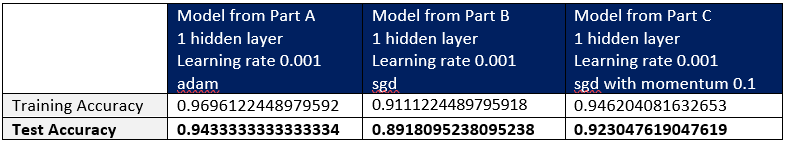
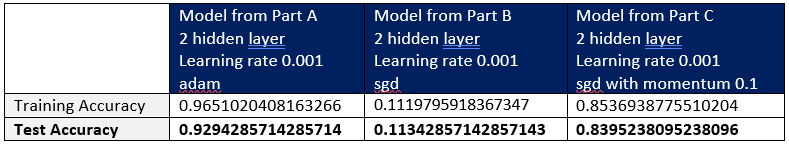

## Part E: Final Architecture and Visualization

In [74]:
mlpc_final = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='adam', learning_rate_init=0.001,random_state=1)
mlpc_final.fit(Xtrain, ytrain)

MLPClassifier(hidden_layer_sizes=50, random_state=1)

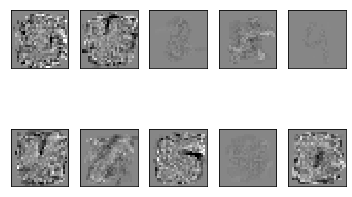

In [75]:
fig, axes = plt.subplots(2, 5)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlpc_final.coefs_[0].min(), mlpc_final.coefs_[0].max()
for coef, ax in zip(mlpc_final.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

## Observations:
The best architecture is 1 hidden layer with the adam solver and learning rate set to 0.001. We can see a sample of the visualized weighted vectors below. Some of these visualizations look like blurred version/outlines of the digits. If the models are trained longer, the results may be clearer than those shown above. 

# Prob 4:Feedforward neural networks on MNIST II

In [77]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
from sklearn.model_selection import validation_curve
from sklearn.metrics import mean_squared_error 

In [141]:
def get_features(m, X):
    if not hasattr(m.hidden_layer_sizes, "__iter__"):
        hidden_layer_sizes = [m.hidden_layer_sizes]
    hidden_layer_sizes = list(hidden_layer_sizes)
    layer_units = [X.shape[1]] + hidden_layer_sizes + [m.n_outputs_]
    activations = [X] + [np.empty((X.shape[0],layer_units[i + 1])) for i in range(m.n_layers_ - 1)]
    #for i in range(m.n_layers_ - 1):
    #    activations.append(np.empty((X.shape[0],layer_units[i + 1])))
    m._forward_pass(activations)
    #final hidden layer
    return activations[-2]

In [142]:
NN_train = get_features(mlpc_final,Xtrain)
NN_test = get_features(mlpc_final,Xvalidate)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\neural_network\_base.py:66: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\neural_network\_base.py:68: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X /= X.sum(axis=1)[:, np.newaxis]


In [143]:
mlpc_best2 = neural_network.MLPClassifier(hidden_layer_sizes=(50),solver='sgd', momentum=0.1,learning_rate_init=0.001,random_state=1)
mlpc_best2.fit(Xtrain, ytrain)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=50, momentum=0.1, random_state=1, solver='sgd')

In [144]:
NN_train2 =  get_features(mlpc_best2,Xtrain)
NN_test2 = get_features(mlpc_best2,Xvalidate)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\neural_network\_base.py:66: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  tmp = X - X.max(axis=1)[:, np.newaxis]
C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\neural_network\_base.py:68: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  X /= X.sum(axis=1)[:, np.newaxis]


In [145]:
print(NN_train.shape)
print(NN_test.shape)

(49000, 50)
(10500, 50)


## Part A: Linear SVM

### Best Model Feature Extractors

In [146]:
#svm_train = n.linear_model.LinearSVC(kernel='linear').fit(NN_train, ytrain)
from sklearn.svm import LinearSVC
svm_train = LinearSVC(random_state=1)
svm_train.fit(NN_train, ytrain) 

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=1)

In [176]:
pred_svm = svm_train.predict(NN_test)
svm_acc_test = svm_train.score(NN_test, yvalidate)
print('Test accuracy SVM:', svm_acc_test)

Test accuracy SVM: 0.8334285714285714


### Second Best Model Feature Extractors

In [148]:
#svm_train = n.linear_model.LinearSVC(kernel='linear').fit(NN_train, ytrain)
svm_train2 = LinearSVC(random_state=1)
svm_train2.fit(NN_train2, ytrain) 

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


LinearSVC(random_state=1)

In [149]:
pred_svm2 = svm_train2.predict(NN_test2)
svm_acc_test2 = svm_train2.score(NN_test2, yvalidate)
print('Test accuracy SVM:', svm_acc_test)

Test accuracy SVM: 0.8334285714285714


## Part B: KNN

### Best Model Feature Extractors 

In [150]:
knn_train = KNeighborsClassifier(weights='uniform').fit(NN_train, ytrain)

param range: [5, 10, 15, 25, 50, 100]
test scores mean: [0.94295238 0.93685714 0.93209524 0.92342857 0.90561905 0.8807619 ]


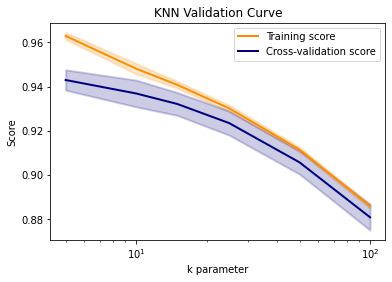

In [151]:
# select from the range
param_range = [5,10,15,25,50,100]

print("param range:", param_range)

train_scores_knn, test_scores_knn = validation_curve(knn_train,Xtest, ytest, param_name="n_neighbors", param_range=param_range,
    scoring="accuracy", n_jobs=8)
train_scores_knn_mean = np.mean(train_scores_knn, axis=1)
train_scores_knn_std = np.std(train_scores_knn, axis=1)
test_scores_knn_mean = np.mean(test_scores_knn, axis=1)
test_scores_knn_std = np.std(test_scores_knn, axis=1)

print("test scores mean:", test_scores_knn_mean)

# Plot CV error as a function of k
plt.title("KNN Validation Curve")
plt.xlabel("k parameter")
plt.ylabel("Score")
lw = 2
plt.semilogx(param_range, train_scores_knn_mean, label="Training score",
             color="darkorange", lw=lw)
plt.fill_between(param_range, train_scores_knn_mean - train_scores_knn_std,
                 train_scores_knn_mean + train_scores_knn_std, alpha=0.2,
                 color="darkorange", lw=lw)
plt.semilogx(param_range, test_scores_knn_mean, label="Cross-validation score",
             color="navy", lw=lw)
plt.fill_between(param_range, test_scores_knn_mean - test_scores_knn_std,
                 test_scores_knn_mean + test_scores_knn_std, alpha=0.2,
                 color="navy", lw=lw)
plt.legend(loc="best")
plt.show()

In [152]:
k_knn = param_range[np.argsort(test_scores_knn_mean)[-1]]
print("The best K: ", k_knn)
dist_knn = KNeighborsClassifier(weights='uniform', n_neighbors=k_knn)
dist_knn.fit(NN_train, ytrain)
acc_train_knn = dist_knn.score(NN_train, ytrain)
acc_test_knn = dist_knn.score(NN_test, yvalidate)
print('Training accuracy:', acc_train_knn)
print('Test accuracy:', acc_test_knn)

The best K:  5
Training accuracy: 0.9762857142857143
Test accuracy: 0.9618095238095238


### Second Best Model Feature Extractors 

In [153]:
k_knn = param_range[np.argsort(test_scores_knn_mean)[-1]]
print("The best K: ", k_knn)
dist_knn2 = KNeighborsClassifier(weights='uniform', n_neighbors=k_knn)
dist_knn2.fit(NN_train2, ytrain)
acc_train_knn2 = dist_knn2.score(NN_train2, ytrain)
acc_test_knn2 = dist_knn2.score(NN_test2, yvalidate)
print('Training accuracy:', acc_train_knn2)
print('Test accuracy:', acc_test_knn2)

The best K:  5
Training accuracy: 0.9719183673469388
Test accuracy: 0.9561904761904761


## Part C: Logistic regression

In [154]:
from sklearn.linear_model import LogisticRegression as LR

### Best Model Feature Extractors 

In [155]:
LRC = LR().fit(NN_train,ytrain)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [169]:
print('Test accuracy:', LRC.score(NN_test,yvalidate))

Test accuracy: 0.9071428571428571


In [157]:
print("The final weights for logistic regression:" , LRC.coef_)

The final weights for logistic regression: [[-1.71717331e-03 -3.99720070e-05  4.53152519e-04  1.26545637e-03
   3.36337319e-04 -5.51710535e-04 -6.28591467e-04 -2.72376100e-04
  -1.18272351e-04  6.21200313e-03  4.33282014e-04 -2.49269744e-04
  -1.33402966e-04 -8.97552367e-06 -8.15528200e-04  1.45577509e-04
  -1.31053273e-03  3.30016154e-04  2.77228619e-04 -2.84135226e-03
   1.40025166e-04  1.69215054e-03 -5.00900295e-04 -2.24124016e-04
   4.04273815e-04 -7.62085980e-04 -8.99138548e-04  9.10021971e-04
  -2.04022867e-03 -8.71723826e-05 -1.51564045e-04 -9.60029213e-04
  -8.92027891e-04 -1.23431554e-03 -1.51126504e-04  3.85971582e-03
  -9.34981280e-04 -3.40611230e-04 -5.67448539e-04 -7.23189379e-04
   1.55063444e-05  2.64041945e-04  4.21225965e-05 -4.21660626e-04
  -2.48985942e-04  1.64853366e-03 -2.01444468e-05 -2.10313639e-06
  -2.02897022e-04  1.82670480e-03]
 [ 6.24497392e-03 -7.76955105e-05 -9.50264013e-04 -2.01824404e-04
   8.57618977e-05 -1.97499096e-04  3.16946169e-03 -5.72093672e-0

In [163]:
print("The final weights for neural network:" , mlpc_final.coefs_[-1])

The final weights for neural network: [[-5.94990772e-03  1.50661412e-01 -3.49148447e-02  6.18528114e-03
   9.72358647e-02  1.06799285e-01  3.30344459e-02  6.27056892e-02
   4.75480958e-02  1.11318852e-01]
 [ 7.36748094e-02  7.45838624e-02 -1.03254655e-01 -5.53283336e-02
   8.33426132e-02  2.41483253e-02  7.52468746e-02 -5.41665611e-02
  -1.91838040e-02 -1.37545052e-02]
 [-7.79909952e-06 -2.98095486e-02 -8.37555533e-02  1.46740790e-02
  -4.20761915e-07 -9.25316574e-02  9.35918298e-02 -1.45919175e-06
   2.19657513e-02  5.21453696e-02]
 [-2.51127084e-02  2.58951060e-01 -2.45835965e-01  1.59434557e-01
  -5.99369000e-02  2.30524822e-01 -1.00873800e-01 -9.89719900e-02
   8.89102416e-02  1.72018249e-02]
 [-1.14856650e-08  1.64836026e-04  1.99144211e-03 -5.76687337e-06
  -1.14565513e-02 -7.19109076e-09  1.68019173e-04  1.41736334e-01
  -3.04431455e-06  7.52801409e-02]
 [-2.46228452e-03  1.25627585e-03  4.13937860e-02 -9.42860507e-03
   1.15623898e-01  4.34859497e-02 -9.46370387e-02  4.05524522

### Second Best Model Feature Extractors 

In [164]:
LRC2 = LR().fit(NN_train2,ytrain)

C:\Users\ytgcl\miniconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [165]:
print('Test accuracy:', LRC2.score(NN_test2,yvalidate))

Test accuracy: 0.9050476190476191


In [166]:
print("The final weights for logistic regression:" , LRC2.coef_)

The final weights for logistic regression: [[-3.13951954e-03 -1.70188569e-03 -2.07469395e-03 -3.84174932e-04
   2.15035731e-03 -7.93701130e-03  3.85277742e-05  4.51765689e-04
   1.66142366e-03  7.58608418e-03 -1.59637580e-03  1.17653611e-03
  -1.38715200e-04 -2.84509665e-03 -2.08630431e-03 -6.06906122e-04
   2.24436133e-03  9.79812013e-04 -1.28068915e-03  3.61864811e-04
   1.65091490e-03 -3.30364990e-03 -1.35367392e-04 -1.66130365e-03
   2.43154702e-03 -1.28168022e-03 -1.77471972e-03  3.01117006e-03
   1.11877544e-03  3.59268471e-03 -7.58701282e-05  1.28031642e-03
  -5.97177009e-03 -3.40810099e-03 -1.63097275e-03  9.13518250e-04
  -1.29811064e-04 -1.24114675e-03 -1.85420155e-03 -1.86747585e-03
  -6.58436488e-04 -2.27183400e-03 -1.65252367e-03 -7.69085522e-04
   1.43579240e-03  2.74143289e-02  2.71975366e-03 -2.00238606e-03
  -1.63516795e-03  7.62033528e-04]
 [ 1.59521444e-02  1.18877038e-02  2.09845303e-03  7.78351425e-03
  -7.34522320e-04 -2.94008215e-03 -4.83490700e-03 -1.93918328e-0

In [167]:
print("The final weights for neural network:" , mlpc_best2.coefs_[-1])

The final weights for neural network: [[-0.1709898   0.13975625 -0.10512422 -0.00039219  0.09114495  0.06066909
  -0.19900351  0.07985834  0.03997329  0.09284072]
 [-0.17544991  0.11911722 -0.16486301 -0.2050683   0.08306422  0.06552345
   0.04961995 -0.21114473 -0.05120213  0.03785388]
 [-0.18884097 -0.28994635 -0.25009995  0.06727288 -0.09255757 -0.23664251
   0.19093821 -0.12326296  0.15184001  0.19669168]
 [ 0.04913624  0.23617924 -0.22887658  0.2391029  -0.18275897  0.29484133
   0.11434404 -0.29759     0.00847672  0.00222422]
 [-0.24839248  0.17767928  0.07741961 -0.10269331 -0.15084313 -0.26674667
   0.20227945  0.28717959 -0.21921816  0.23376446]
 [-0.05282227 -0.04765252 -0.06097987 -0.01759746  0.00824521 -0.0186126
  -0.05695523 -0.00100162 -0.04145032  0.03860961]
 [-0.242532    0.26207638  0.11598608 -0.27078056  0.16315129  0.29728531
  -0.13715809 -0.02700422 -0.03328117 -0.12707958]
 [ 0.09760017 -0.00169292 -0.14886621  0.07285625 -0.20395647  0.17023763
  -0.14384974 

### Observations:
With logistic regression the best model test accuracy is 0.9071428571428571 and the second best model is 0.9050476190476191. When looking at the weights, there are definitely some differences between logistic regression and neural network but the results are still  similar. Neural network performs better with accuracy overall more complex data which is why we can see the differences.